In [4]:
import sys
import pandas as pandas
import numpy as np
import sklearn
import mglearn
import matplotlib.pyplot as plt


# Dimensionality Reduction , Feature Extraction, and Manifold Learning
- common motivations are visualization, compressing the data, and finding a representation that is more informative for futher processing
- PCA is one of the simplest and most widely used algorithms for all of these
- NMF commonly used for feature extraction
- t-SNE commonly used for visualization using two dinemsional scatter plots


## Principal Component Analysis (PCA)
- method that rotates the dataset in a way such that the rotated features are statistically uncorrelated.
- often followed by selecting only a subset of the new features, according to how important they are for explaining the data.


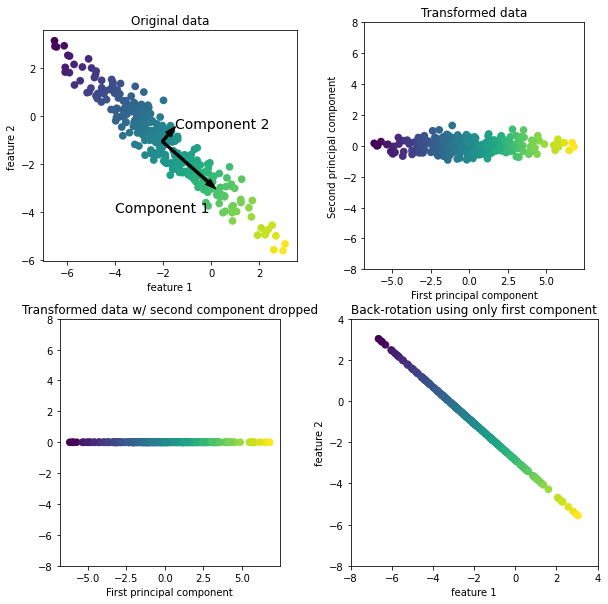

In [3]:
mglearn.plots.plot_pca_illustration()

- often used for dimensionality reduction by retaining only some of the principal components.
- in the fourth panel, we undo the rotation and add the mean back to the data. Returning the points  to the original feature space. This transformation is sometimes used to remove noise effects from the data  or visualize what part of the information is retaining using the principal components

## Applying PCA to the cancer data set for visualization


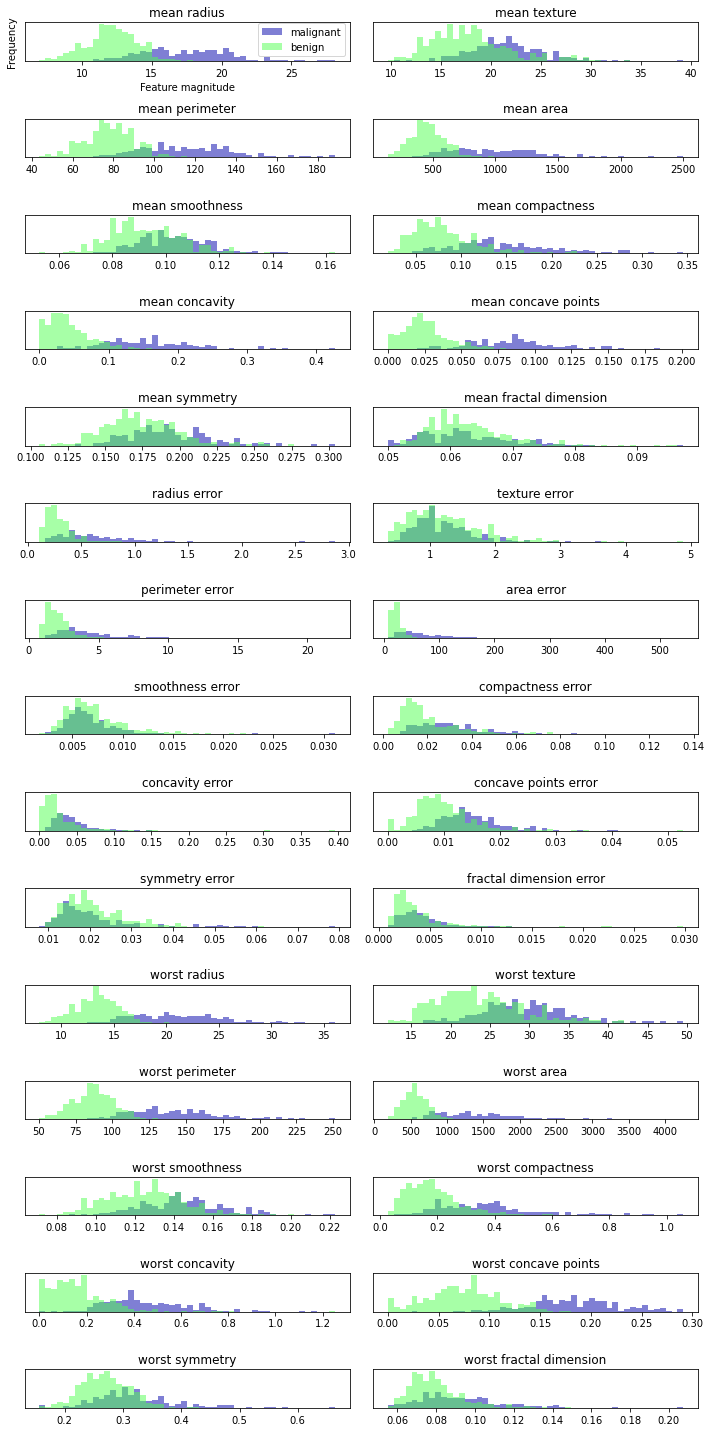

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15,2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()




- before applying PCA, we scale our data so that each feature has unit variance using StandardScaler()


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [9]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

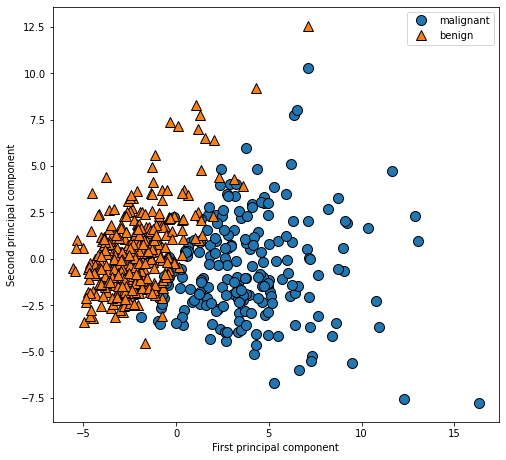

In [10]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- does not use any class information when finding the rotaion. simply looks at the correlations in the data
- we can see the two classes separate quite well in thie two-dimensional space.
- This leads us to believe that even a linearl classifier (learning a line in this space) could do a reasonably good job at distinguishing the two classes.
- downside of PCA is that the two axes in this plot are not very easy to interpret (as is often the case for PCA components). 


In [13]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


- each row in *components_* corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, "mean radius," "mean texture," and so on.

In [14]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

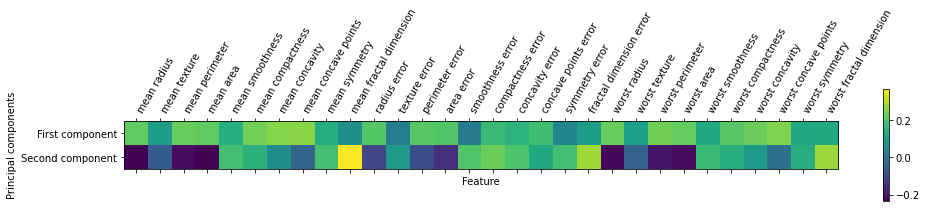

In [15]:
# visualize the coefficients using a heat map
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
    cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Eigenfaces or feature extraction
- feature extraction is used to find a representation of the data that is better suited to analysis that the raw representation


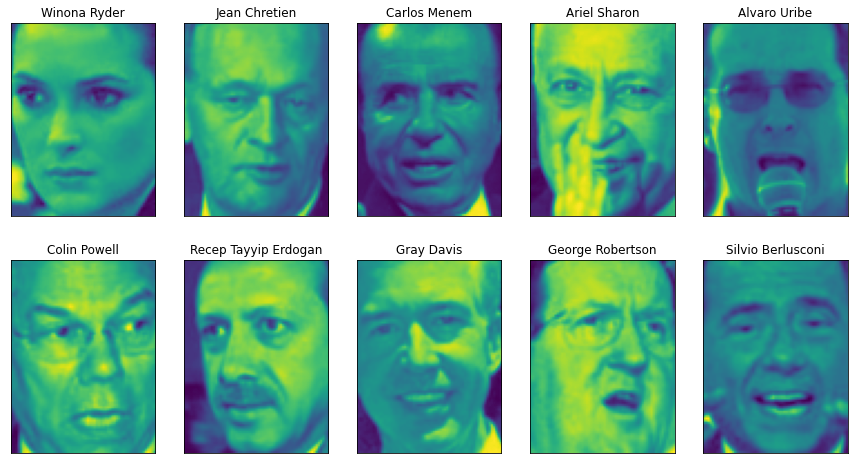

In [20]:
# example of feature extraction on images using PCA
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2,5, figsize=(15,8),
    subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [21]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [22]:
# count how often each target appears
counts = np.bincount(people.target)

#print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i+1) %3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

- to make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush)


In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255


- a common task in face recognition is to identify if a previously unseen face belongs to a known person in the database. The challenge of this is there are likely limited number of training examples for each person limiting the effective classifiers. Additionally, you often want to be able to add new people easily, without needing to retrain a large model. A simple solution is to use one-nearest neighbor classifier. Identifying the most similar face image to the face being classified. 

In [25]:
from  sklearn.neighbors import KNeighborsClassifier# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)
#build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


- accuracy of 23% is not great, but better than random guessing
- We'll now look at applying PCA, avoiding computing distances in the original pixel space as this is quite a bad way to measure similarity between faces.
    - When using a pixel representation to compare two images, we compare the grayscale value of each individual pixel to the value of the pixel in the corresponding position in the other image. Quite different from how humans would interpret the image of a face.
- Measuring distances along the principal components will hopefully improve our accuracy. 
- Enabling *whitening* option of PCA, rescales the principal components to have the same scale. As if using *StandardScaler* after the transformation.
- *Whitening* corresponds to not only rotating the data, but also rescaling


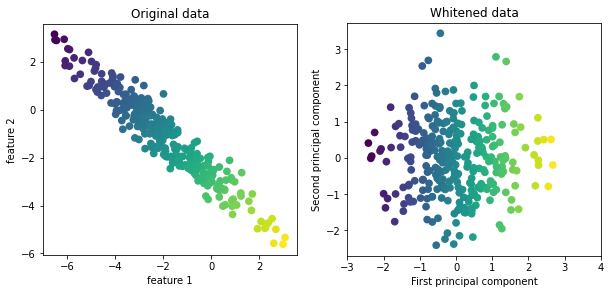

In [26]:
mglearn.plots.plot_pca_whitening()


In [28]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


- our accuracy improved quite significantly, confirming our intuition that the principal components might provide a better representation of the data

pca.components_.shape: (100, 5655)


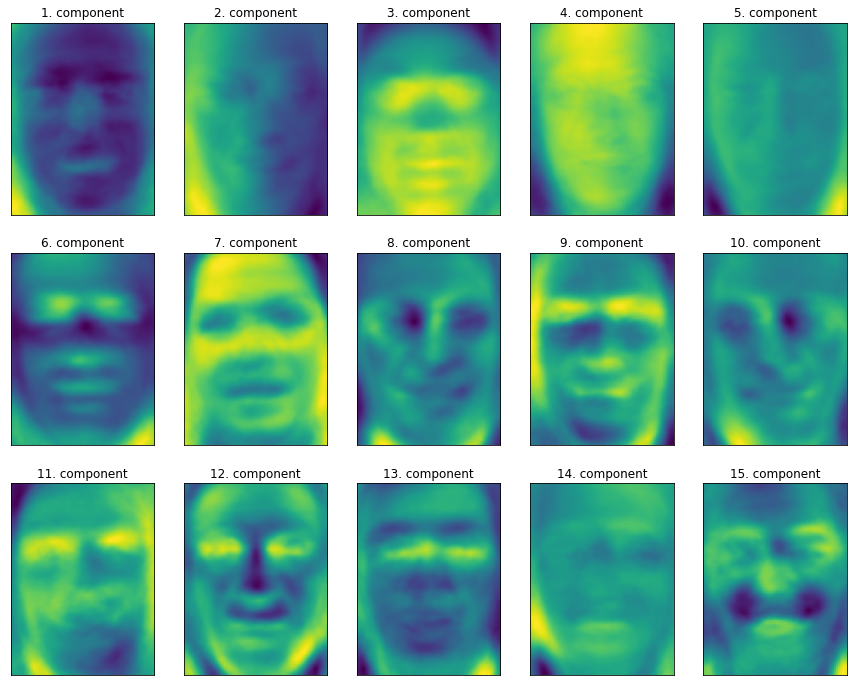

In [30]:
print("pca.components_.shape: {}".format(pca.components_.shape))

fix, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks':() })

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i +1)))


- still far from how a human might perceive a face.
- As the PCA model is based on pixels, the alignment of the face and the lighting both have a strong influence on how similar two images are in their pixel representation
- reminder that algorithms often interpret data quite differently from how a human would

We can look at reconstructions of the original data using only some components to try and understand what our PCA model is doing.
- Reduce the data to only some principal components and then rotate back into the original space.
- Returning to the original feature space can be done using *inverse_transform*

Below we visualize the reconstruction of some faces using 10,50, 100, 500, or 2000 components

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
_______________________________________________________pca_faces - 23.9s, 0.4min


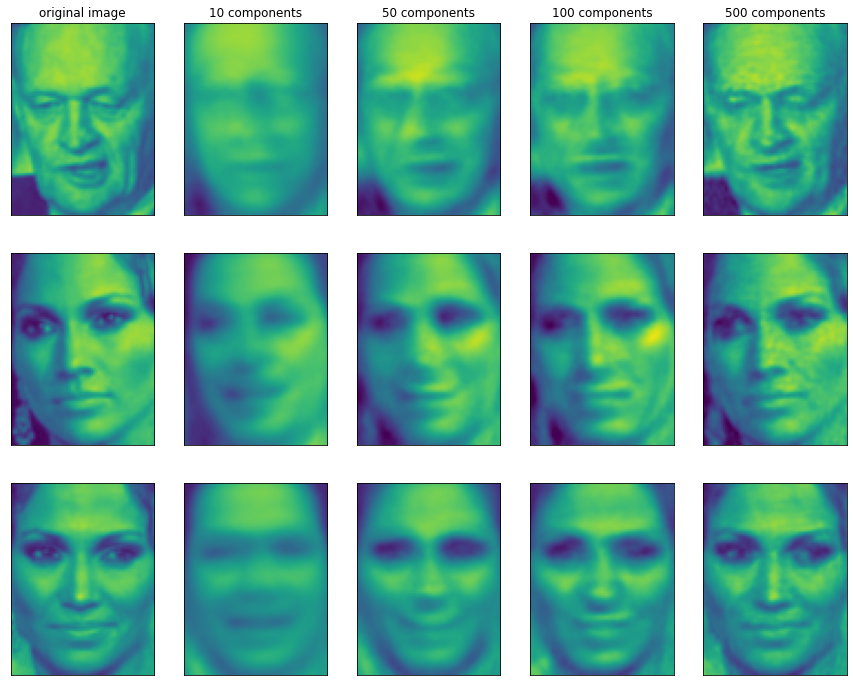

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

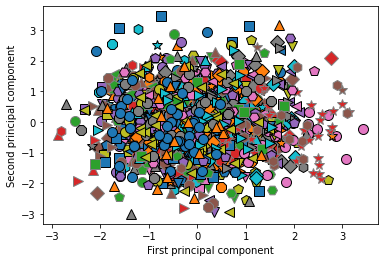

In [31]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- when using only the first two principal components the whole data is just a big blog with no separation of classes visible